# SIR Epidemic Model

$S(t)$ - Susceptible  
$I(t)$ - Infected  
$R(t)$ - Recovered

$$S + I + R = N,$$  
$$\frac{dS}{dt} = - \frac{\beta S I}{N},$$  
$$\frac{dI}{dt} = \frac{\beta S I}{N}-\gamma I,$$  
$$\frac{dR}{dt} = \gamma I$$

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import kaggle

months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month
#months_fmt = mdates.DateFormatter('%')

sns.set(style="ticks", color_codes=True)
plt.style.use('classic')
plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':12})
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
%matplotlib inline

In [86]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('imdevskp/corona-virus-report', path='data/', unzip=True)

In [87]:
df = pd.read_csv('data\covid_19_clean_complete.csv')

In [88]:
df['DateFormatted'] = pd.to_datetime(df['Date'])

In [89]:
df_uk = df['Country/Region'] == 'United Kingdom'

In [90]:
df_uk_full = df[df_uk]['Province/State'].isnull()

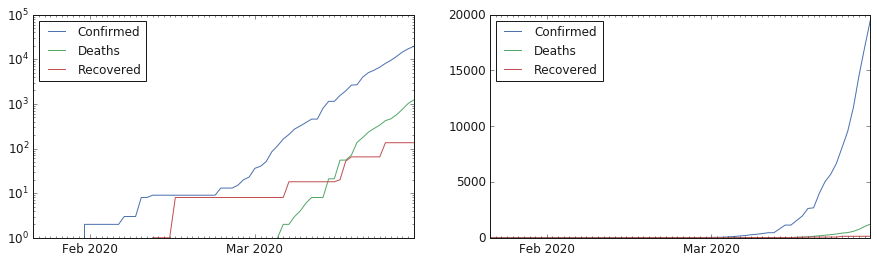

In [110]:
fig_CDR = plt.figure(figsize = (15,4))
ax1_CDR = fig_CDR.add_subplot(1, 2, 1)
ax1_CDR.plot(df[df_uk][df_uk_full]['DateFormatted'],df[df_uk][df_uk_full]['Confirmed'],label='Confirmed')
ax1_CDR.plot(df[df_uk][df_uk_full]['DateFormatted'],df[df_uk][df_uk_full]['Deaths'],label='Deaths')
ax1_CDR.plot(df[df_uk][df_uk_full]['DateFormatted'],df[df_uk][df_uk_full]['Recovered'],label='Recovered')

ax1_CDR.xaxis.set_major_locator(months)
#ax1_CDR.xaxis.set_major_formatter(months_fmt)
ax1_CDR.xaxis.set_minor_locator(days)

ax1_CDR.set_yscale("log")
ax1_CDR.legend(loc='upper left')

ax2_CDR = fig_CDR.add_subplot(1, 2, 2)
ax2_CDR.plot(df[df_uk][df_uk_full]['DateFormatted'],df[df_uk][df_uk_full]['Confirmed'],label='Confirmed')
ax2_CDR.plot(df[df_uk][df_uk_full]['DateFormatted'],df[df_uk][df_uk_full]['Deaths'],label='Deaths')
ax2_CDR.plot(df[df_uk][df_uk_full]['DateFormatted'],df[df_uk][df_uk_full]['Recovered'],label='Recovered')

ax2_CDR.xaxis.set_major_locator(months)
#ax1_CDR.xaxis.set_major_formatter(months_fmt)
ax2_CDR.xaxis.set_minor_locator(days)

ax2_CDR.legend(loc='upper left')